# 简单线性回归和向量化python代码实现 
2019/10/21 zx青

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 3, 2, 4, 3, 5, 7])

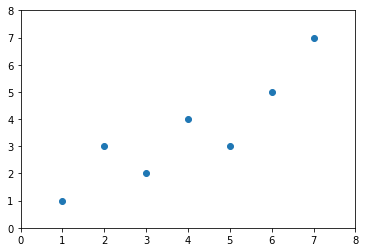

In [10]:
plt.scatter(x, y)
plt.axis([0, 8, 0, 8])
plt.show()

In [11]:
x_mean = np.mean(x)
y_mean = np.mean(y)

![jupyter](./line.jpg)

In [12]:
num = 0.0 # 分子
d = 0.0 # 分母
for x_i, y_i in zip(x, y): 
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [13]:
a = num / d
b = y_mean - a * x_mean

In [53]:
a

0.8214285714285714

In [15]:
b

0.28571428571428603

In [16]:
y_hat = a * x + b

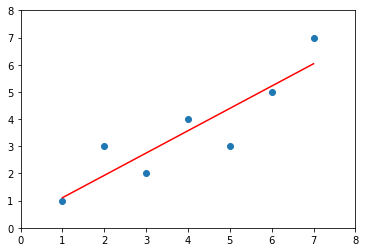

In [19]:
plt.scatter(x, y)
plt.plot(x ,y_hat, color='r')
plt.axis([0, 8, 0, 8])
plt.show()

In [22]:
x_predict = 9
y_predict = a * x_predict + b
y_predict

7.678571428571429

In [56]:
# 向量化计算,点乘运算代替for循环运算
numv = 0.0 # 分子
dv = 0.0 # 分母

numv = (x - x_mean).dot(y - y_mean)
dv = (x - x_mean).dot(x - x_mean)

av = numv / dv
bv= y_mean - a * x_mean

In [57]:
av # 和之前的值一样

0.8214285714285714

In [58]:
bv  # 和之前的值一样

0.28571428571428603

### 向量化实现的性能测试

In [85]:
# 先把之前的两种计算方式封装成函数，方便调用
def fit(x_train, y_train):
    x_mean = np.mean(x_train)
    y_mean = np.mean(y_train)
    num = 0.0 # 分子
    d = 0.0 # 分母
    for x_i, y_i in zip(x_train, y_train): 
        num += (x_i - x_mean) * (y_i - y_mean)
        d += (x_i - x_mean) ** 2
    a = num / d
    b = y_mean - a * x_mean
   
    return a, b

In [86]:
def fit_v(x_train, y_train):
    # 向量化计算,点乘运算代替for循环运算
    x_mean = np.mean(x_train)
    y_mean = np.mean(y_train)
    numv = 0.0 # 分子
    dv = 0.0 # 分母
    numv = (x_train - x_mean).dot(y_train - y_mean)
    dv = (x_train - x_mean).dot(x_train - x_mean)

    av = numv / dv
    bv= y_mean - a * x_mean
    
    return av, bv

In [87]:
# 生成规模有100万的随机测试数据
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

In [88]:
%timeit fit(big_x, big_y)
%timeit fit_v(big_x, big_y) # 向量化的运算速度明显快

1.03 s ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
36.8 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [89]:
fit(big_x, big_y)

(1.9987407501233247, 2.999901796747946)

In [96]:
fit_v(big_x, big_y)


(1.998740750123337, 3.588299824748583)